<h1>Activité 7 - Condensateurs et filtres</h1>

<h2 style="color:blue">Section 1 - Introduction</h2>

<p>Ceci est un "jupyter notebook", qui sert à exécuter un code écrit dans le langage de programmation "python", un langage très populaire dans le monde scientifique. Pour exécuter une cellule, vous devez d'abord la sélectionner en cliquant dans celle-ci. Ensuite, vous appuyez sur SHIFT+ENTER pour en exécuter le contenu. Le résultat apparaît alors en dessous de la cellule.</p>

<p>Pour vous pratiquer, exécutez la cellule ci-dessous. Vous verrez le résultat apparaître sous la cellule.</p>

In [65]:
# Les lignes qui commencent par un # sont des commentaires.
# Ces lignes ne sont pas exécutées.
4+2

6

<h2 style="color:blue">Section 2 - Filtres RC</h2>

<p></p>

<p>Dans cette section, nous créons deux signaux sinusoïdaux de fréquences différentes. Lorsque ces signaux sont acheminés à un haut-parleur ou à des écouteurs, ces derniers émettent un son dont la fréquence correspond à la fréquence du signal. Plus la fréquence d'un son est élevée, plus le son est aigu. L'humain peut entendre les sons dont la fréquence se situe entre 20 Hz et 20 kHz environ.</p>
<p>Nous simulerons ensuite l'effet qu'aurait un filtre RC sur le signal comprenant les deux sons créés, afin d'observer et d'entendre le résultat.</p>

<h3>Importation de modules</h3>
<p>Afin d'employer certaines fonctions dans notre code, nous devons importer des modules. Exécutez la cellule suivante pour importer les modules requis.</p>

In [66]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

<h3>Définition de quelques paramètres</h3>
<p>Avant de créer nos deux signaux sonores, nous devons définir quelques paramètres. Exécutez la cellule suivante pour définir ces paramètres.</p>

In [67]:
sampleRate = 44100
duration = 6.0

# Création des valeurs de temps
t = np.linspace(0, duration, int(duration*sampleRate), endpoint=False)

<h3>Onde sonore 1</h3>
<p>Nous sommes prêts à définir notre premier signal sonore, qui sera contenu dans la variable "wave1". Dans le code ci-dessous, fixez la fréquence à 100 Hz, ce qui nous donnera un son plutôt grave. Exécutez ensuite la cellule pour créer l'onde et afficher un graphique. Ce graphique présente les valeurs de potentiel qui sont appliquées sur le haut-parleur en fonction du temps.</p>
<p>Vous pourrez ensuite écouter ce son en appuyant sur le bouton de lecture qui s'affichera sous le graphique. Si vous changez la fréquence, vous pourrez obtenir un son plus aigu ou plus grave (exécutez la cellule après avoir modifié la fréquence pour appliquer les changements). Assurez-vous de remettre la fréquence à 100 Hz et d'exécuter la cellule avant de passer à l'étape suivante.</p>

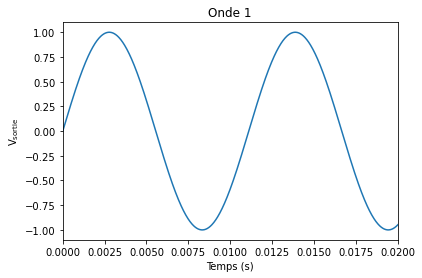

In [82]:
# Fréquence, en Hz
frequency1 = 90

#Amplitude de l'onde
amplitude1 = 1

# Création de l'onde 1
wave1 = amplitude1*np.sin(2*np.pi*frequency1*t)

# Graphique
plt.plot(t,wave1)
plt.title("Onde 1")
plt.axis([0,0.02,-1.1,1.1])
plt.xlabel("Temps (s)")
plt.ylabel("$\mathregular{V_{sortie}}$")
plt.show()

# Lecture du son
ipd.Audio(wave1, rate=sampleRate)

<h3>Onde sonore 2</h3>
<p>Créons maintenant notre deuxième signal sonore. Cette fois-ci, le signal sera contenu dans la variable "wave2". Dans le code ci-dessous, fixez la fréquence à 1600 Hz et exécutez la cellule pour afficher le graphique correspondant à ce signal et pour pouvoir écouter le son. Il s'agit d'un son plutôt aigu, qui n'est pas très agréable. Attention à vos oreilles!</p>

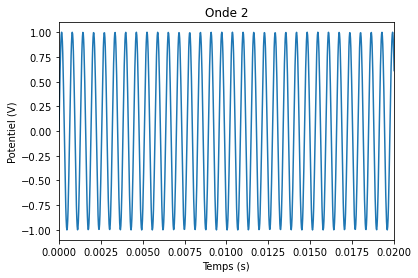

In [69]:
# Fréquence, en Hz
frequency2 = 1567.98

# Amplitude de l'onde
amplitude2 = 1

# Création de l'onde 2
wave2 = amplitude2*np.sin(2*np.pi*frequency2*t)

# Graphique
plt.plot(t,wave2)
plt.title("Onde 2")
plt.axis([0,0.02,-1.1,1.1])
plt.xlabel("Temps (s)")
plt.ylabel("$\mathregular{V_{sortie}}$")
plt.show()

# Lecture du son
ipd.Audio(wave2, rate=sampleRate)

<h3>Les deux ondes sonores superposés</h3>
<p>Créons maintenant un signal qui contient les deux sons précédents. Rien de plus simple. Ce nouveau signal, qui sera contenu dans la variable "sound", est simplement la somme des deux autres signaux, "wave1" et "wave2". Exécutez la cellule suivante pour créer ce signal et pour l'écouter. Vous remarquerez alors dans le graphique que le signal obtenu est un sinus, par dessus un sinus. En écoutant le son (attention, son désagréable), vous remarquerez qu'on peut entendre les deux sons créés précédemment, simultanément.</p>

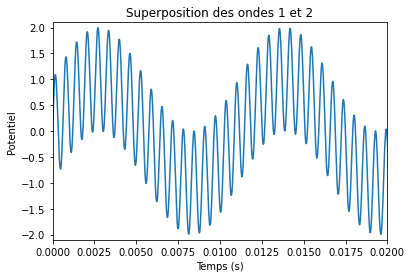

In [70]:
# Création de l'onde superposée
sound = wave1 + wave2

# Graphique
plt.plot(t,sound)
plt.title("Superposition des ondes 1 et 2")
plt.axis([0,0.02,-2.1,2.1])
plt.xlabel("Temps (s)")
plt.ylabel("$\mathregular{V_{sortie}}$")
plt.show()

# Lecture du son
ipd.Audio(sound, rate=sampleRate)

<h3>Simulation des filtres RC</h3>
<p>Supposons maintenant qu'avant d'envoyer ce signal aux haut-parleurs, nous le faisons passer dans un filtre RC. Le son obtenu sera altéré différemment selon qu'il s'agit d'un filtre passe-haut ou d'un filtre passe-bas. La cellule qui suit sert à simuler l'effet qu'aurait un filtre RC sur notre signal. Les fonctions employées dépassent largement le cadre de ce cours. Nous nous concentrerons donc seulement sur le calcul de la réponse en fréquence.</p>
<p>Dans la cellule ci-dessous, ajustez les valeurs de R et de C afin d'obtenir un filtre passe-bas, qui bloquera la haute fréquence le plus possible, tout en laissant passer au moins 80% de notre basse fréquence. En Python, les exposants se calculent avec le symbole **, et non avec le symbole ^. <i>Servez-vous des valeurs trouvées à l'aide d'Excel dans la partie précédente de l'activité</i>. Exécutez ensuite la cellule.</p>

<p>Le premier graphique présente les fréquences contenues dans le signal original et dans le signal filtré. On remarque la présence de deux pics, correspondant aux deux signaux que nous avons additionnés. Le graphique contient aussi la réponse en fréquence de notre filtre. En écoutant le son obtenu, remarquez que le son aigu sonne maintenant moins fort qu'avant, alors que le son grave n'est pas très affecté par le filtre.</p>

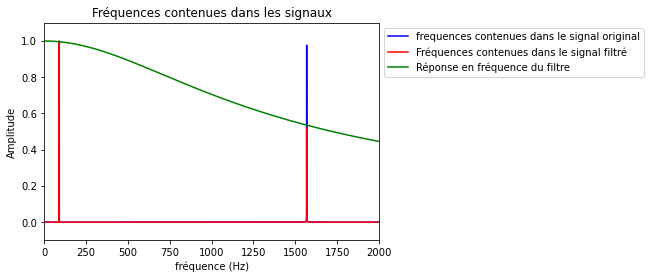

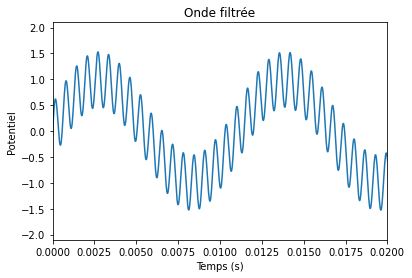

In [71]:
# Transformée de Fourier (sert à calculer les fréquences contenues dans le signal)
amplitudes = np.fft.rfft(sound)
frequencies = np.fft.rfftfreq(sound.size, d=1/sampleRate)

# Graphique des amplitudes originales (courbe bleue)
plt.plot(frequencies,np.abs(amplitudes)*2/(sampleRate*duration), color="blue", label="frequences contenues dans le signal original")
plt.axis([0,2000,-0.1,1.1])
plt.xlabel("fréquence (Hz)")
plt.ylabel("Amplitude")

# Valeurs de résistance (en ohm) et de capacité (en farad) du circuit RC
R=5
C=32*10**(-6)

# Calcul de la réponse en fréquences
frequencyResponse = (1+(2*np.pi*frequencies*R*C)**2)**(-1/2)

#Calcul des nouvelles amplitudes
filteredAmplitudes = amplitudes * frequencyResponse

# Graphique des nouvelles amplitudes (courbe rouge)
plt.plot(frequencies,np.abs(filteredAmplitudes)*2/(sampleRate*duration), color="red", label="Fréquences contenues dans le signal filtré")

# Graphique de la réponse en fréquence du filtre (courbe verte)
plt.plot(frequencies, frequencyResponse, "green", label="Réponse en fréquence du filtre")
plt.legend(loc=2,bbox_to_anchor=(1, 1))
plt.title("Fréquences contenues dans les signaux")
plt.show()

# Transformée de Fourier inverse
filteredSound = np.fft.irfft(filteredAmplitudes)

# Graphique de l'onde filtrée
plt.plot(t,filteredSound)
plt.axis([0,0.02,-2.1,2.1])
plt.xlabel("Temps (s)")
plt.ylabel("$\mathregular{V_{sortie}}$")
plt.title("Onde filtrée")
plt.show()

# Lecture du son
ipd.Audio(filteredSound, rate=sampleRate)

<p>Servez-vous de la cellule précédente pour simuler l'effet d'un filtre passe-haut. Pour s'y faire, choisissez des valeurs de R et C qui permettent d'atténuer la basse fréquence le plus possible, tout en conservant 80% du signal de haute fréquence. Ensuite, modifiez l'équation de réponse en fréquence afin qu'elle soit celle d'un filtre passe-haut. Exécutez la cellule pour observer et écouter l'effet de votre filtre passe-haut. </p>
<p><i>Note: La valeur de pi s'obtient en écrivant np.pi. Les fréquences sont contenues dans une variable nommée "frequencies".</i></p>

<h2 style="color:blue">Section 3 - Effet "walkie talkie"</h2>
<p> Dans cette section, nous utiliserons un filtre passe-bas et un filtre passe-haut afin d'altérer une voix. Lorsque ces deux filtres sont utilisés simultanément, ils bloquent les basses fréquences et les hautes fréquences, ne laissant passer que les fréquences se trouvant ni trop basses, ni trop élevées. On appelle cela un filtre passe-bande, puisqu'il laisse passer les fréquences contenues dans une certaine bande.</p>
<p>
En atténuant les basses et les hautes fréquences, il est possible de recréer le son des walkie talkie ou des vielles radios, puisque ceux-ci étaient conçus pour ne transmettre que les fréquences d'une certaine bande.
</p>

<h3>Fichier original</h3>
<p>Nous utiliserons le son provenant d'un fichier externe, que je vous fournis avec le programme. Exécutez la cellule ci-dessous pour extraire les données du fichier audio. En observant le graphique obtenu, vous constaterez que le signal est beaucoup plus conplexe que le sinus créé précédemment. Ce signal peut être considéré comme une superposition d'un très grand nombre de signaux sinusoïdaux.</p>

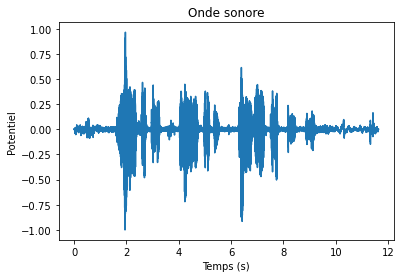

In [72]:
# Extraction des données du fichier audio
rate, sound = wavfile.read("voix.wav")
sound = sound.T[0]/np.max(np.abs(sound))
duration = len(sound)/rate
t = np.linspace(0, duration, int(duration*rate), endpoint=False)

# Graphique
plt.plot(t,sound)
plt.title("Onde sonore")
plt.xlabel("Temps (s)")
plt.ylabel("$\mathregular{V_{sortie}}$")
plt.show()

# Lecture du fichier original
ipd.Audio(sound, rate=rate)

<h3>Filtre passe-bande</h3>
<p>Puisque ce signal est composé d'un grand nombre de signaux sinusoïdaux superposés, il contient une grande variété de fréquences, contrairement à notre signal précédent (section 2), qui n'est contenait que deux. Modifiez les valeurs de R et C du filtre passe-bas (variables R1 et C1), et les valeurs de R et C du filtre passe-haut (variables R2 et C2) afin d'obtenir l'effet désiré (comme si la personne parlait dans un walkie talkie). Pour vous aider, regardez le graphique de réponse en fréquence obtenu. On souhaite éliminer le plus possible les fréquences qui ne se trouvent pas entre 1000 et 2500 Hz, mais garder autant que possible les fréquences dans cet intervalle.</p>

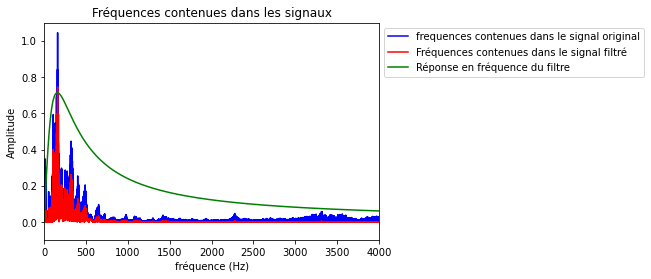

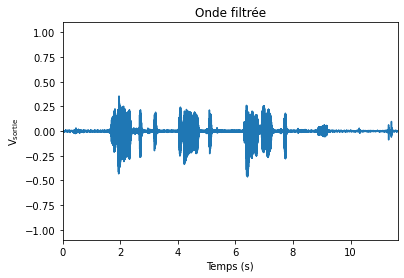

In [84]:
# Transformée de Fourier (sert à calculer les fréquences contenues dans le signal)
amplitudes = np.fft.rfft(sound)
frequencies = np.fft.rfftfreq(sound.size, d=1/rate)
scalingFactor = 100

# Graphique des amplitudes originales (courbe bleue)
plt.plot(frequencies,np.abs(amplitudes)*2/(rate*duration)*scalingFactor, color="blue", label="frequences contenues dans le signal original")
plt.axis([0,4000,-0.1,1.1])
plt.xlabel("fréquence (Hz)")
plt.ylabel("Amplitude")

# Valeurs de résistance (en ohm) et de capacité (en farad) du filtre passe-bas
R1=50
C1=32*10**(-6)

# Valeurs de résistance (en ohm) et de capacité (en farad) du filtre passe-haut
R2=20
C2=32*10**(-6)

# Calcul de la réponse en fréquence du filtre passe-bas
highPassFrequencyResponse = (2*np.pi*frequencies*R1*C1)*(1+(2*np.pi*frequencies*R1*C1)**2)**(-1/2)

#Calcul de la réponse en fréquence du filtre passe-haut
lowPassFrequencyResponse = (1+(2*np.pi*frequencies*R2*C2)**2)**(-1/2)

#Calcul de la réponse en fréquence totale (filtre passe-bande)
frequencyResponse = highPassFrequencyResponse*lowPassFrequencyResponse

#Calcul des nouvelles amplitudes
filteredAmplitudes = amplitudes * frequencyResponse

# Graphique des nouvelles amplitudes (courbe rouge)
plt.plot(frequencies,np.abs(filteredAmplitudes)*2*scalingFactor/(rate*duration), color="red", label="Fréquences contenues dans le signal filtré")

# Graphique de la réponse en fréquence du filtre (courbe verte)
plt.plot(frequencies, frequencyResponse, "green", label="Réponse en fréquence du filtre")
plt.legend(loc=2,bbox_to_anchor=(1, 1))
plt.title("Fréquences contenues dans les signaux")
plt.show()

# Transformée de Fourier inverse
filteredSound = np.fft.irfft(filteredAmplitudes)

# Graphique de l'onde filtrée
plt.plot(t,filteredSound)
plt.axis([0,len(filteredSound)/rate,-1.1,1.1])
plt.xlabel("Temps (s)")
plt.ylabel("$\mathregular{V_{sortie}}$")
plt.title("Onde filtrée")
plt.show()

# Lecture du son
ipd.Audio(filteredSound, rate=rate)